<a href="https://colab.research.google.com/github/kalpana256/CIFAR10-Image_Classification/blob/main/CIFAR10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 50.8MB/s 
     |████████████████████████████████| 501kB 54.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 


In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 14.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPool2D, Dropout

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Load Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train.max()

255

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

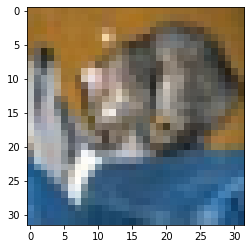

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
from tensorflow.keras.layers import BatchNormalization


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size=35, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1429/1429 [==============================] - 41s 6ms/step - loss: 1.3062 - sparse_categorical_accuracy: 0.5380 - val_loss: 1.1443 - val_sparse_categorical_accuracy: 0.6063
Epoch 2/10
1429/1429 [==============================] - 9s 6ms/step - loss: 0.8643 - sparse_categorical_accuracy: 0.6973 - val_loss: 0.7802 - val_sparse_categorical_accuracy: 0.7294
Epoch 3/10
1429/1429 [==============================] - 8s 6ms/step - loss: 0.7264 - sparse_categorical_accuracy: 0.7464 - val_loss: 0.7729 - val_sparse_categorical_accuracy: 0.7326
Epoch 4/10
1429/1429 [==============================] - 8s 6ms/step - loss: 0.6358 - sparse_categorical_accuracy: 0.7786 - val_loss: 0.7466 - val_sparse_categorical_accuracy: 0.7431
Epoch 5/10
1429/1429 [==============================] - 8s 6ms/step - loss: 0.5589 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.6697 - val_sparse_categorical_accuracy: 0.7729
Epoch 6/10
1429/1429 [==============================] - 8s 6ms/step - loss: 0.5007 - spar

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7437 - sparse_categorical_accuracy: 0.7793


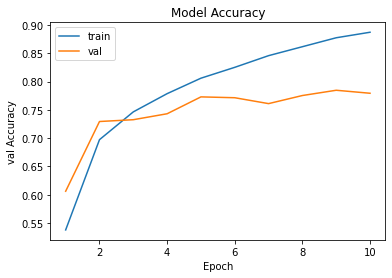

In [ ]:
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('val Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([3, 8, 8, ..., 5, 0, 7])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
mat=confusion_matrix(y_test, y_pred)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8ca708250>)

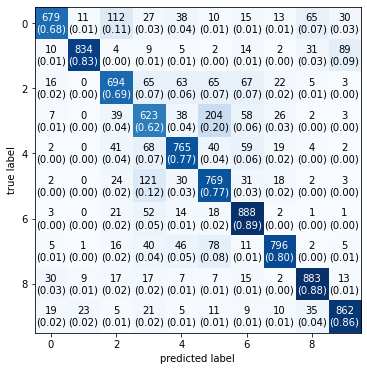

In [ ]:
plot_confusion_matrix(mat, figsize=(6,6), show_normed=True)

In [ ]:
model.save("Cifar-10 model.h5")

In [ ]:
import pickle
with open('models.pickle', 'wb') as f:
    pickle.dump(history.history, f)